# Installing And Importing Dependencies

In [1]:
#SDP Gymtracker 
#{media pipe for pose estimation}, {opencv}
!pip install mediapipe opencv-python

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
#Video feed
cap = cv2.VideoCapture(0) #input 0 is my webcam ie input device provider, play around for the correct one
while cap.isOpened():
    ret,frame = cap.read() #read the input, ret is return var n frame is the feed
    cv2.imshow('Mediapipe Feed', frame) #Visualizing the img feed
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #0xFF is keyboard i/p q to quit
        break

cap.release() #release webcam
cv2.destroyAllWindows()

# Making Detections
Line 3, tradeoff between detecting pose and tracking (maintaining a state) accuracy
line 12 store results in array

In [8]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    while cap.isOpened():
        ret,frame = cap.read() 
        
        #Recoloring img to RGB for pose model; 2nd line check but saves mmry
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #make detection and store it in results
        results = pose.process(image)
        
        #recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (246,117, 66), thickness = 2, circle_radius = 2),
                                 mp_drawing.DrawingSpec(color = (246,66, 230), thickness = 2, circle_radius = 2)
                                 )
        
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    

In [2]:
#results.pose_landmarks
#mp_pose.POSE_CONNECTIONS

# Determining Joints
Mediapipe has total 33 coords depicting joints, starting from 0

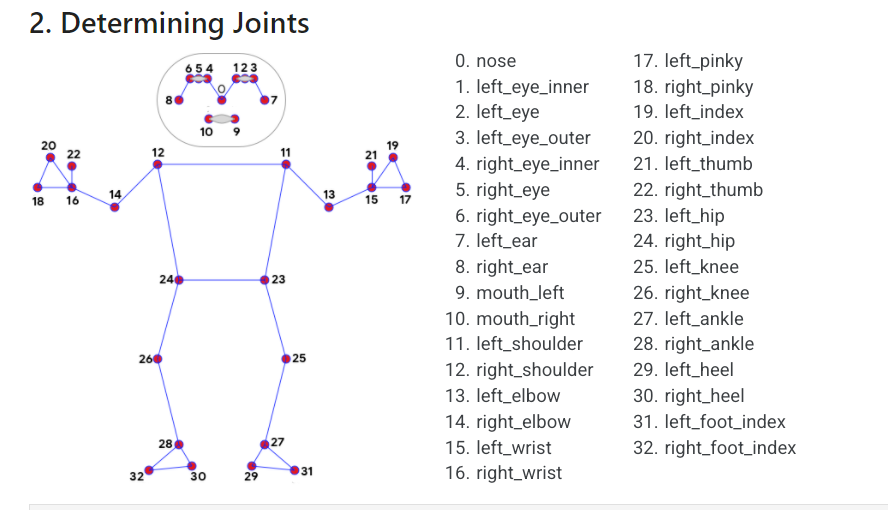


In [9]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    while cap.isOpened():
        ret,frame = cap.read() 
        
        #Recoloring img to RGB for pose model; 2nd line check but saves mmry
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #make detection and store it in results
        results = pose.process(image)
        
        #recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (246,117, 66), thickness = 2, circle_radius = 2),
                                 mp_drawing.DrawingSpec(color = (246,66, 230), thickness = 2, circle_radius = 2)
                                 )
        
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

[x: 0.44180259108543396
y: 0.5187337398529053
z: -1.2049455642700195
visibility: 0.9994121789932251
, x: 0.46981602907180786
y: 0.4608532190322876
z: -1.1194297075271606
visibility: 0.9992284774780273
, x: 0.4863819181919098
y: 0.461824893951416
z: -1.1200037002563477
visibility: 0.9992308616638184
, x: 0.5031729936599731
y: 0.4633852243423462
z: -1.120313048362732
visibility: 0.9992005228996277
, x: 0.40770572423934937
y: 0.46023237705230713
z: -1.1289101839065552
visibility: 0.9990702271461487
, x: 0.3835623264312744
y: 0.4619757831096649
z: -1.1285854578018188
visibility: 0.9990611672401428
, x: 0.3608159124851227
y: 0.46482646465301514
z: -1.1291697025299072
visibility: 0.9990686774253845
, x: 0.5203495025634766
y: 0.5056478977203369
z: -0.596293568611145
visibility: 0.9992951154708862
, x: 0.3295336663722992
y: 0.5009211301803589
z: -0.6397364139556885
visibility: 0.9989960789680481
, x: 0.47111934423446655
y: 0.5976364612579346
z: -1.0105379819869995
visibility: 0.99940025806427


In [24]:
#len(landmarks)

In [25]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [31]:
#print(landmarks[16])
landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
#mp_pose.PoseLandmark.RIGHT_WRIST.value
#mp_pose.PoseLandmark.RIGHT_WRIST

x: 0.41209444403648376
y: 1.290378212928772
z: -1.7019487619400024
visibility: 0.13113631308078766

In [32]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.8026341199874878
y: 1.1391710042953491
z: -0.17881719768047333
visibility: 0.4974345266819

In [33]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.9340300559997559
y: 1.2778388261795044
z: -0.6410384178161621
visibility: 0.03320515528321266

In [34]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.885249137878418
y: 1.156307578086853
z: -0.9564195871353149
visibility: 0.06721828877925873

# Calculate angles


In [2]:
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

In [49]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [50]:
shoulder, elbow, wrist

([0.8026341199874878, 1.1391710042953491],
 [0.9340300559997559, 1.2778388261795044],
 [0.885249137878418, 1.156307578086853])

In [54]:
calculate_angle(shoulder, elbow, wrist)

162.4512964279727

In [5]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    while cap.isOpened():
        ret,frame = cap.read() 
        
        #Recoloring img to RGB for pose model; 2nd line check but saves mmry
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #make detection and store it in results
        results = pose.process(image)
        
        #recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            #print(landmarks)
            
            #Get coords
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            #Visualize angle
            cv2.putText(image, str(angle),
                       tuple(np.multiply(elbow, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
            
        except:
            pass
        
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (246,117, 66), thickness = 2, circle_radius = 2),
                                 mp_drawing.DrawingSpec(color = (246,66, 230), thickness = 2, circle_radius = 2)
                                 )
        
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

# Left Curl Counter


In [4]:
cap = cv2.VideoCapture(0)

#Curl Counter Variables
counter = 0
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    while cap.isOpened():
        ret,frame = cap.read() 
        
        #Recoloring img to RGB for pose model; 2nd line check but saves mmry
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #make detection and store it in results
        results = pose.process(image)
        
        #recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            #print(landmarks)
            
            #Get coords
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            #Visualize angle
            cv2.putText(image, str(angle),
                       tuple(np.multiply(elbow, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
            
            #Curl Counter logic
            if angle>160:
                stage = 'Down'
            if angle<30 and stage == 'Down':
                stage = 'Up'
                counter += 1
                #print(counter)
            
        except:
            pass
        
        #render curl counter
        #setup status box
        cv2.rectangle(image, (0,0), (300, 73), (245,117,16), -1)
        
        #rep data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
         #Stage data
        cv2.putText(image, 'STAGE', (80,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (90,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (246,117, 66), thickness = 2, circle_radius = 2),
                                 mp_drawing.DrawingSpec(color = (246,66, 230), thickness = 2, circle_radius = 2)
                                 )
        
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

# Right Curl Counter

In [5]:

cap = cv2.VideoCapture(0)

#Curl Counter Variables
counter = 0
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    while cap.isOpened():
        
        ret,frame = cap.read() 
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            #print(landmarks)
            
            #Get coords
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            #Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            #Visualize angle
            cv2.putText(image, str(angle),
                       tuple(np.multiply(elbow, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
            
            #Curl Counter logic
            if angle>160:
                stage = 'Down'
            if angle<30 and stage == 'Down':
                stage = 'Up'
                counter += 1
                #print(counter)
            
        except:
            pass
   
        #render curl counter
        #setup status box
        cv2.rectangle(image, (0,0), (300, 73), (245,117,16), -1)
        
        #rep data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
         #Stage data
        cv2.putText(image, 'STAGE', (80,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (90,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (246,117, 66), thickness = 2, circle_radius = 2),
                                 mp_drawing.DrawingSpec(color = (246,66, 230), thickness = 2, circle_radius = 2)
                                 )
        
        cv2.imshow('My Bicep Curl Counter', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

        
    cap.release()
    cv2.destroyAllWindows()